<a href="https://colab.research.google.com/github/desireesosa/EDPII/blob/main/MetododeGalerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Método de Galerkin.***

*Use la notebook adjunta para resolver el problema de la imagen (note que hay una errata: el texto dice phi en vez de beta).*

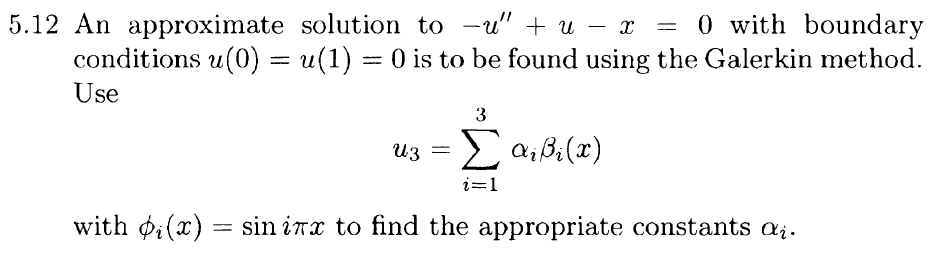

*Este es un tipo de método de residuos pesados, donde las funciones de peso coinciden con las funciones base $\beta_1$.*


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


***Solucion:***

In [10]:
x = sp.symbols('x')
alpha1, alpha2, alpha3 = sp.symbols('alpha1 alpha2 alpha3')

#Base
beta1 = sp.sin(sp.pi*x)
beta2 = sp.sin(2*sp.pi*x)
beta3 = sp.sin(3*sp.pi*x)

#Aprox
u3 = alpha1*beta1 + alpha2*beta2 + alpha3*beta3

#Residuo
Residuo = -sp.diff(u3, x, 2) + u3 - x

eq1 = sp.integrate(Residuo * beta1, (x, 0, 1))
eq2 = sp.integrate(Residuo * beta2, (x, 0, 1))
eq3 = sp.integrate(Residuo * beta3, (x, 0, 1))

sol_alpha = sp.solve([eq1, eq2, eq3], [alpha1, alpha2, alpha3])


In [11]:
sol_alpha

{alpha1: 2/(pi + pi**3),
 alpha2: -1/(pi + 4*pi**3),
 alpha3: 2/(3*pi + 27*pi**3)}

In [13]:
u3_approx = u3.subs(sol_alpha)
sp.simplify(u3_approx)

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

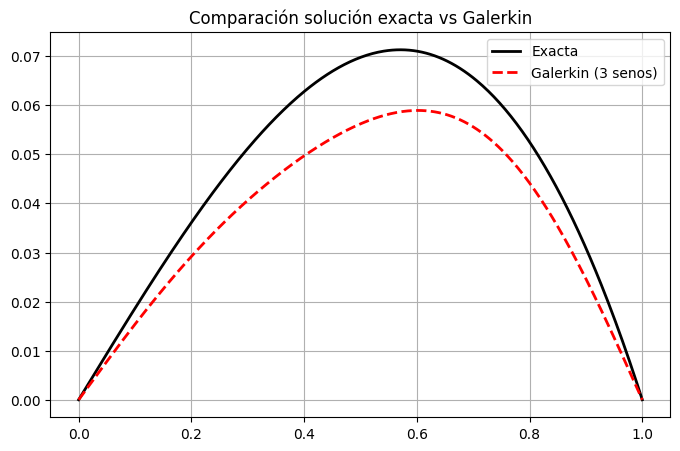

In [14]:
u3_num = sp.lambdify(x, u3_approx, 'numpy')

xx = np.linspace(0,1,400)
plt.figure(figsize=(8,5))
plt.plot(xx, u_num(xx), 'k', label="Exacta", linewidth=2)
plt.plot(xx, u3_num(xx), 'r--', label="Galerkin (3 senos)", linewidth=2)
plt.title("Comparación solución exacta vs Galerkin")
plt.legend()
plt.grid(True)
plt.show()